**Тестирование определения границ окружности и её обрезки**

In [2]:
import cv2
import PIL
from PIL import Image

from src.utils import TresholdCutter

img = cv2.imread('../pictures/rec_00400.tif')
filterd_image  = cv2.medianBlur(img, 7)
filterd_image = cv2.cvtColor(filterd_image, cv2.COLOR_BGR2GRAY)
img_cutter = TresholdCutter()
cutted_data = img_cutter.cut_data(filterd_image)
PIL.Image.fromarray(cutted_data).show()


**Тестирование предобработки изображения**

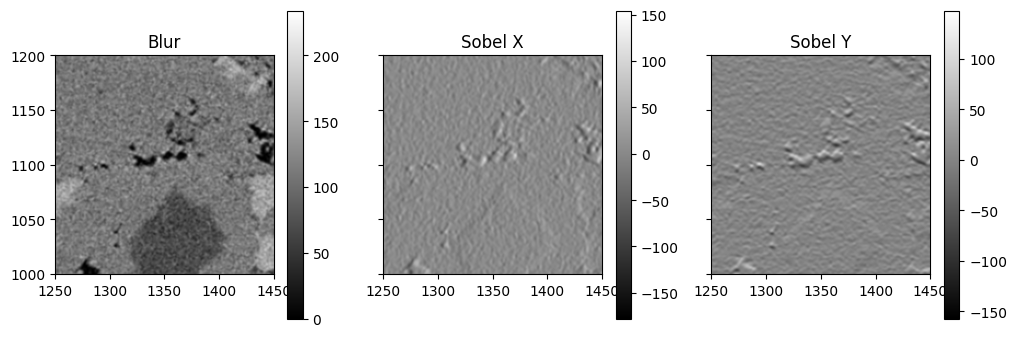

(2615, 2615) (2615, 2615) (2615, 2615)


In [8]:
from src.Preparer import Preparer
from matplotlib import pyplot as plt
import cv2

img = cv2.imread('../pictures/rec_00400.tif')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

(data_blur, sobelx, sobely) = Preparer.calculate(data=img, kernel_size=3, sobel_kernel_size=5)



fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), sharex=True, sharey=True)
im = axs[0].imshow(data_blur, cmap='gray')
axs[0].set_title('Blur')
axs[0].set_xlim([1250, 1450])  # Выбираемая область по оси x
axs[0].set_ylim([1000, 1200])
plt.colorbar(im, ax=axs[0])
im =axs[1].imshow(sobelx, cmap='gray')
axs[1].set_title('Sobel X')
plt.colorbar(im, ax=axs[1])
im = axs[2].imshow(sobely, cmap='gray')
axs[2].set_title('Sobel Y')
plt.colorbar(im, ax=axs[2])
plt.show()

print(data_blur.shape, sobelx.shape, sobely.shape)


**Тестирование аугментации**

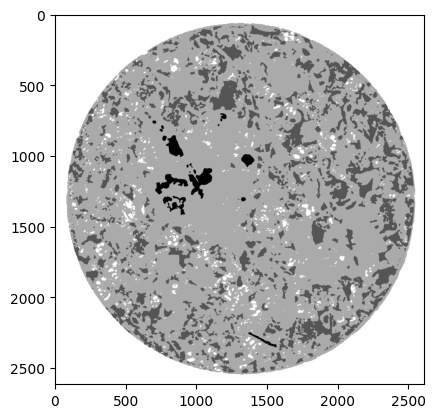

In [2]:
img = cv2.imread('../pictures/Label_400_final.tif')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img, cmap='gray')

In [1]:
from src.Augmentator import Augmentator
import cv2
import numpy as np
from matplotlib import pyplot as plt
from src.Preparer import Preparer
import PIL

data = cv2.imread('../pictures/rec_00400.tif')
data = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)
label = cv2.imread('../pictures/Label_400_final.tif')

data_blur, sobelx, sobely = Preparer.calculate(data=data, kernel_size=3, sobel_kernel_size=3)

data = Augmentator.augment_data(data_blur, sobelx, sobely, d_a=100)
label = Augmentator.augment_label(label, d_a=100)

print(data.shape)

(2615, 2615)
(2615, 2615)
(2615, 2615)


100%|██████████| 40/40 [00:17<00:00,  2.27it/s]

(2000, 128, 128, 3)
